<a href="https://colab.research.google.com/github/gwyoun05/Machine-Learning/blob/main/Machine_Learning_Assignment_6_Introduction_to_Deep_Learning_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning_Assignment 6_Introduction to Deep Learning with Keras**

**Task**
Define Keras sequential model correspondent to model_plot.png and make prediction for data = np.ones((1,10)). This prediction (one float number) is the answer of this task. Enter it on tab Quiz.

In [1]:
import tensorflow as tf
import tensorflow.keras
import keras.backend as K
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten ,Reshape
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Lambda
import numpy as np
import pandas as pd
import json

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
import numpy as np
import imageio
import cv2

In [2]:
print(tf.__version__)

2.4.1


In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs available: ", len(physical_devices))

Num GPUs available:  0


**Week 6**
**Data**
Click left sidebar Download data and save compressed (zipped) file machine_learning_06_data.zip to your local folder. Unpack it there and get your data file model_plot.png. File containes the plot of the network. Here is the example.

In [6]:
import os
os.getcwd()
os.chdir('C:\\Users\\gwyoun\\Desktop\\Machine_Learning\\WEEK_6')

FileNotFoundError: ignored

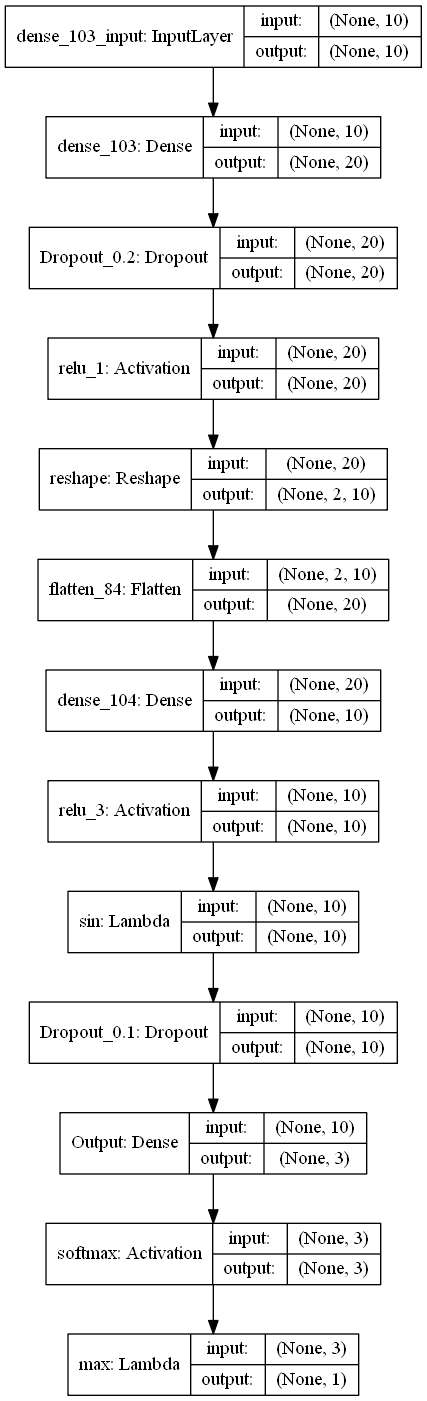

In [2]:
data = np.ones((1,10))
data 

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [8]:
modelpng = imageio.imread('model_plot.png')
#modelpng
#img = cv2.imread('model_plot.png') 
#imgplot = plt.imshow(modelpng)

FileNotFoundError: ignored

In [12]:
def maxsoftmax(x):
    lx = tf.argmax(x, axis=0)
    maxsoft = tf.gather(x, lx)
    return maxsoft

In [4]:
model =  Sequential() # create model

Specify the first (hidden) layer.

In [6]:
# for encoder1
#sess = tf.InteractiveSession
model =  Sequential()

model.add(Input(shape=(10,), name='dense_103_input'))
model.add(Dense(20, input_shape=(10,),batch_size=None,name="dense_103",kernel_initializer=tf.keras.initializers.Identity()))
model.add(Dropout(0.2,seed=1,name="Dropout_0.2"))
model.add(Activation('relu',name="relu_1"))
model.add(Reshape((2, 10), input_shape=(20,),name="reshape"))
model.add(Flatten(name="flatten_84"))
model.add(Dense(units=10,name="dense_104",kernel_initializer=tf.keras.initializers.Identity()))
model.add(Activation('relu',name="relu_3"))
model.add(Lambda(lambda x: tf.math.sin(x),name = "sin")) #https://www.tensorflow.org/api_docs/python/tf/keras/layers/Lambda
model.add(Dropout(0.1,seed=1,name="Dropout_0.1"))
model.add(Dense(units=3,name="Output",kernel_initializer=tf.keras.initializers.Identity()))
model.add(Activation('softmax',name="softmax"))
#model.add(Lambda(max))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 20)                220       
_________________________________________________________________
Dropout_0.2 (Dropout)        (None, 20)                0         
_________________________________________________________________
relu_1 (Activation)          (None, 20)                0         
_________________________________________________________________
reshape (Reshape)            (None, 2, 10)             0         
_________________________________________________________________
flatten_84 (Flatten)         (None, 20)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 10)                210       
_________________________________________________________________
relu_3 (Activation)          (None, 10)               

In [7]:
model.layers

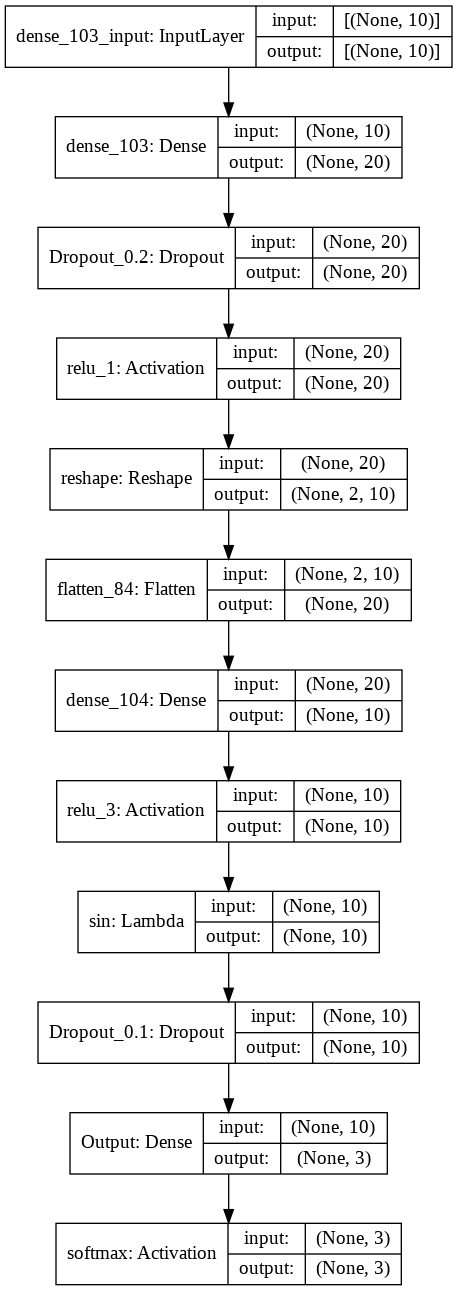

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model11.png',show_shapes=True,show_layer_names=True)

In [9]:
model.compile(loss='mse', optimizer='adam')

In [10]:
model.predict(data)

array([[0.33333334, 0.33333334, 0.33333334]], dtype=float32)

In [14]:
preds = model.predict(data)
preds.shape
preds

array([[0.33333334, 0.33333334, 0.33333334]], dtype=float32)

In [15]:
preds_class_prob = tf.argmax(preds, axis=1)

preds_class_prob
#preds[preds_class_prob]

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>

In [16]:
np.arange(5, 10).reshape(5, 1)

array([[5],
       [6],
       [7],
       [8],
       [9]])